<a target="_blank" href="https://colab.research.google.com/github/ArtificialIntelligenceToolkit/aitk/blob/master/notebooks/Advanced/XOR.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore how hidden representations evolve

In this notebook we will train a network to learn to solve XOR. This is one of the simplest examples of a problem that is **not** linearly separable and thus requires a network with at least one hidden layer that uses a non-linear activation function.

We will record how the weights change over time during training. Then we can visualize how the weight changes create linearly separable hidden representations from the non-linearly separable inputs.

In [1]:
%pip install aitk --quiet

In [2]:
import aitk.networks
from time import sleep

## Training set

The inputs and outputs for the XOR problem are defined below.

In [3]:
inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
targets = [0, 1, 1, 0]

## Create the network

We will create a simple network with an input layer of size 2, a hidden layer of size 3, and an output layer of size 1, using the sigmoid activation function.

In [4]:
net = aitk.networks.SimpleNetwork(2, 3, 1, activation="sigmoid")

## Test the network

The following block of code can be used to test all of the XOR inputs on the network.
* If you run this block before training, you should observe that all of the outputs are approximately the same for each input.
* If you run this block after training you should see that the network has correctly learned to output values close to 0 for the first and last input and close to 1 for the middle two inputs.

In [9]:
for i in range(len(inputs)):
  output = net.propagate(inputs[i])
  net.display(inputs[i])
  print("output is: ", output)
  sleep(1.0)

output is:  [0.2098160684108734]


## Train the network

WHY ISN"T ACCURACY DISPLAYING CORRECTLY??

In [6]:
net.fit(
    inputs, targets,
    epochs=1500,
    batch_size=4,
    report_rate=100,
    accuracy=1.0,
    tolerance=0.2,
    patience=1,
    save=100,
)

Epoch 1500/1500 loss: 0.026451770216226578 - tolerance_accuracy: 0.0


## Re-test the network

Go back to the preivous code block to re-test the network after training is complete. It should have successfully learned to solve the problem.

## Visualize evolving representations

Now we can watch how the network's representations evolved over time. The red dots represent the data for which we want the network to output 0 and the blue dots represent the data for which we want the network to output 1.


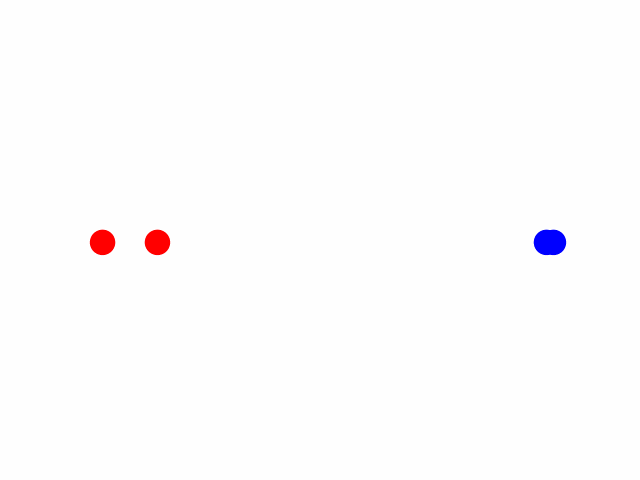
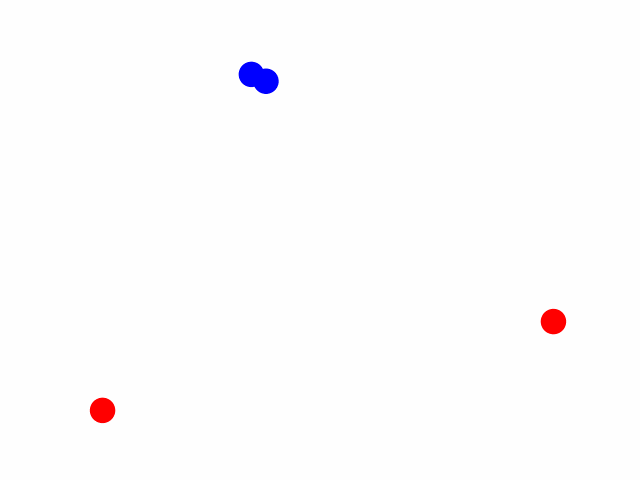
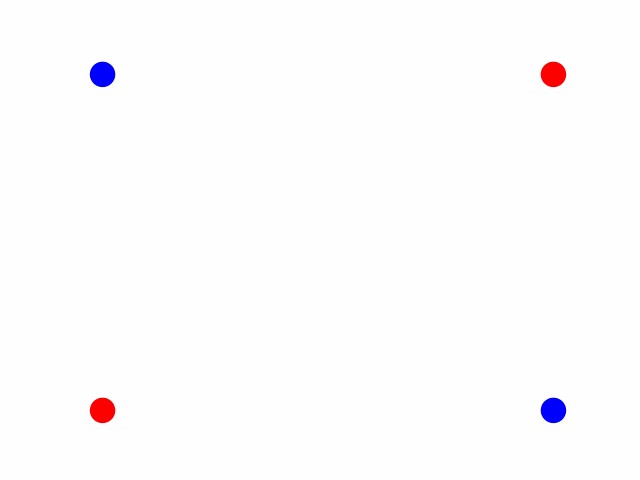

epoch 1500


In [7]:
for epoch, weights in net.get_weights_from_history():
    net.set_weights(weights)
    net.predict_pca(inputs, scale=.5, colors=["r", "b", "b", "r"], sizes=300)
    print("epoch %s" % (epoch))
    sleep(1.0)